# Model Buildings And Evaluation

## Importing Libraries

In [3]:
import os
import re
import nltk
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

## Loading Dataset

In [4]:
csv_path = os.path.join(os.path.dirname(os.getcwd()),'Datasets', 'cleaned_spam_data.csv')
spam_dataset = pd.read_csv(csv_path)

spam_dataset

,message,label
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah think go usf life around though,ham
...,...,...
5164,nd time tried contact u u pound prize claim ea...,spam
5165,b going esplanade fr home,ham
5166,pity mood suggestion,ham
5167,guy bitching acted like interested buying some...,ham


### Checking For Null Values

In [5]:
for i in spam_dataset.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(spam_dataset[i].isna().sum()))


 Column Name :message
 Total no of null values : 7

 Column Name :label
 Total no of null values : 0


In [6]:
spam_dataset.dropna(inplace=True)
spam_dataset.reset_index(drop=True, inplace=True)

In [7]:
for i in spam_dataset.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(spam_dataset[i].isna().sum()))


 Column Name :message
 Total no of null values : 0

 Column Name :label
 Total no of null values : 0


## Peforming Train Test Split

In [8]:
x = spam_dataset.loc[:,'message']

x.shape

(5162,)

In [9]:
le = LabelEncoder()
y = le.fit_transform(spam_dataset.loc[:,'label'])

y.shape

(5162,)

### Tokenizeing The Data

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=20, padding='post')

x

array([[   5, 3301,  268, ...,    0,    0,    0],
       [   8,  215, 1157, ...,    0,    0,    0],
       [ 405,  828,  764, ...,  236,   30,  332],
       ...,
       [7121, 1480, 3298, ...,    0,    0,    0],
       [ 128, 7122, 3268, ...,    0,    0,    0],
       [2040,  370,  165, ...,    0,    0,    0]])

In [11]:
len(x)


5162

## Model Building

In [12]:
length_pad = 20
no_of_words = 7982

### Splitting The Data into 70% Test set and 30% train set

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

### Creating model with 70% Train size and 30% Test size

In [14]:
model = Sequential()
model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,640,065 (6.26 MB)

 Trainable params: 1,640,065 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8481 - loss: 0.3553 - val_accuracy: 0.9787 - val_loss: 0.0692
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9829 - loss: 0.0483 - val_accuracy: 0.9832 - val_loss: 0.0590
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9973 - loss: 0.0189 - val_accuracy: 0.9742 - val_loss: 0.0982
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9949 - loss: 0.0131 - val_accuracy: 0.9819 - val_loss: 0.0618
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9993 - loss: 0.0069 - val_accuracy: 0.9813 - val_loss: 0.0985
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9983 - loss: 0.0046 - val_accuracy: 0.9813 - val_loss: 0.0973
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9793 - val_loss: 0.1174
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 1.0000 - loss: 1.8491e-04 - val_accurac

In [16]:
model.save('model1.h5')

### Splitting The Data into 80% Test set and 20% train set

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Creating Default Model with 80% Train size and 20% Test size

In [18]:
def_model = Sequential()
def_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
def_model.add(LSTM(256, return_sequences=True))
def_model.add(LSTM(128))
def_model.add(Dense(128, activation='relu'))
def_model.add(Dense(64, activation='relu'))
def_model.add(Dense(32, activation='relu'))
def_model.add(Dense(1, activation='sigmoid'))

def_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
def_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,640,065 (6.26 MB)

 Trainable params: 1,640,065 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
def_history = def_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.8135 - loss: 0.4025 - val_accuracy: 0.9758 - val_loss: 0.0731
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9854 - loss: 0.0526 - val_accuracy: 0.9777 - val_loss: 0.0807
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9957 - loss: 0.0190 - val_accuracy: 0.9835 - val_loss: 0.0915
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accuracy: 0.9787 - val_loss: 0.1213
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9806 - val_loss: 0.1306
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9988 - loss: 0.0102 - val_accuracy: 0.9777 - val_loss: 0.1507
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9994 - loss: 0.0050 - val_accuracy: 0.9777 - val_loss: 0.1576
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9993 - loss: 0.0064 - val_accuracy: 0.

In [20]:
def_model.save('model2.h5')

In [21]:
def_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,920,197 (18.77 MB)

 Trainable params: 1,640,065 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,280,132 (12.51 MB)

### Creating Model With Early Stopping with 20% Test size

In [22]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=20)

In [23]:
es_model = Sequential()
es_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
es_model.add(LSTM(256, return_sequences=True))
es_model.add(LSTM(128))
es_model.add(Dense(128, activation='relu'))
es_model.add(Dense(64, activation='relu'))
es_model.add(Dense(32, activation='relu'))
es_model.add(Dense(1, activation='sigmoid'))

es_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
es_history = es_model.fit(xtrain, ytrain, epochs=1000, batch_size=64, validation_data=(xtest, ytest), callbacks=[early])

Epoch 1/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.9129 - loss: 0.3304 - val_accuracy: 0.9681 - val_loss: 0.0887
Epoch 2/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9894 - loss: 0.0487 - val_accuracy: 0.9797 - val_loss: 0.0690
Epoch 3/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9947 - loss: 0.0242 - val_accuracy: 0.9729 - val_loss: 0.1459
Epoch 4/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.9777 - val_loss: 0.0934
Epoch 5/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9984 - loss: 0.0105 - val_accuracy: 0.9758 - val_loss: 0.1367
Epoch 6/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9739 - val_loss: 0.1374
Epoch 7/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9990 - loss: 0.0069 - val_accuracy: 0.9787 - val_loss: 0.1308
Epoch 8/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.9992 - loss: 0.0050 - val_accu

In [25]:
es_model.save('model3.h5')

In [26]:
es_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,920,197 (18.77 MB)

 Trainable params: 1,640,065 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,280,132 (12.51 MB)

### Creating Model With Drop Out Layer with 20% Test size

In [27]:
dol_model = Sequential()
dol_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
dol_model.add(LSTM(400, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
dol_model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(128, activation='relu'))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(64, activation='relu'))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(1, activation='sigmoid'))

dol_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
dol_history = dol_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.9982 - loss: 0.0111 - val_accuracy: 0.9593 - val_loss: 0.3277
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.9973 - loss: 0.0147 - val_accuracy: 0.9690 - val_loss: 0.2202
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9792 - loss: 0.0760 - val_accuracy: 0.9719 - val_loss: 0.1452
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.9979 - loss: 0.0126 - val_accuracy: 0.9700 - val_loss: 0.1560
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.9979 - loss: 0.0045 - val_accuracy: 0.9758 - val_loss: 0.2493
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 469ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9739 - val_loss: 0.2549
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9993 - loss: 0.0049 - val_accuracy: 0.9739 - val_loss: 0.2785
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9991 - loss: 0.0096 - val_accura

In [30]:
dol_model.save('model4.h5')

In [31]:
dol_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 20, 400)        │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 200)            │       480,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,149,221 (27.27 MB)

 Trainable params: 2,383,073 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,766,148 (18.18 MB)

### Creating Model With Drop Out Layer & Early Stopping with 20% Test size

In [32]:
es_dol_model = Sequential()
es_dol_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
es_dol_model.add(LSTM(400, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
es_dol_model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(128, activation='relu'))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(64, activation='relu'))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(1, activation='sigmoid'))

es_dol_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_dol_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 20, 400)        │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 200)            │       480,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,383,073 (9.09 MB)

 Trainable params: 2,383,073 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
es_dol_history = es_dol_model.fit(xtrain, ytrain, epochs=1000, batch_size=64, validation_data=(xtest, ytest), callbacks=[early])

Epoch 1/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.8689 - loss: 0.3395 - val_accuracy: 0.9758 - val_loss: 0.1108
Epoch 2/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9877 - loss: 0.0606 - val_accuracy: 0.9603 - val_loss: 0.2592
Epoch 3/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9935 - loss: 0.0368 - val_accuracy: 0.9816 - val_loss: 0.0890
Epoch 4/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.9970 - loss: 0.0110 - val_accuracy: 0.9787 - val_loss: 0.1224
Epoch 5/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.9980 - loss: 0.0144 - val_accuracy: 0.9787 - val_loss: 0.1496
Epoch 6/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9973 - loss: 0.0305 - val_accuracy: 0.9758 - val_loss: 0.1512
Epoch 7/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.9962 - loss: 0.0193 - val_accuracy: 0.9787 - val_loss: 0.2076
Epoch 8/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.9987 - loss: 0

In [34]:
es_dol_model.save('model5.h5')

In [35]:
es_dol_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 20, 400)        │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 200)            │       480,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,149,221 (27.27 MB)

 Trainable params: 2,383,073 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,766,148 (18.18 MB)

## Model Evaluation

In [36]:
model = load_model('model1.h5')
def_model = load_model('model2.h5')
es_model = load_model('model3.h5')
dol_model = load_model('model4.h5')
es_dol_model = load_model('model5.h5')

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Evaluating  Model with 30% Test size :-
Model Accuracy   :  0.97
Model precision  :  0.92
Model recall     :  0.89
Model f1_score   :  0.9
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       899
           1       0.92      0.89      0.90       134

    accuracy                           0.97      1033
   macro avg       0.95      0.94      0.94      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[888  11]
 [ 15 119]]


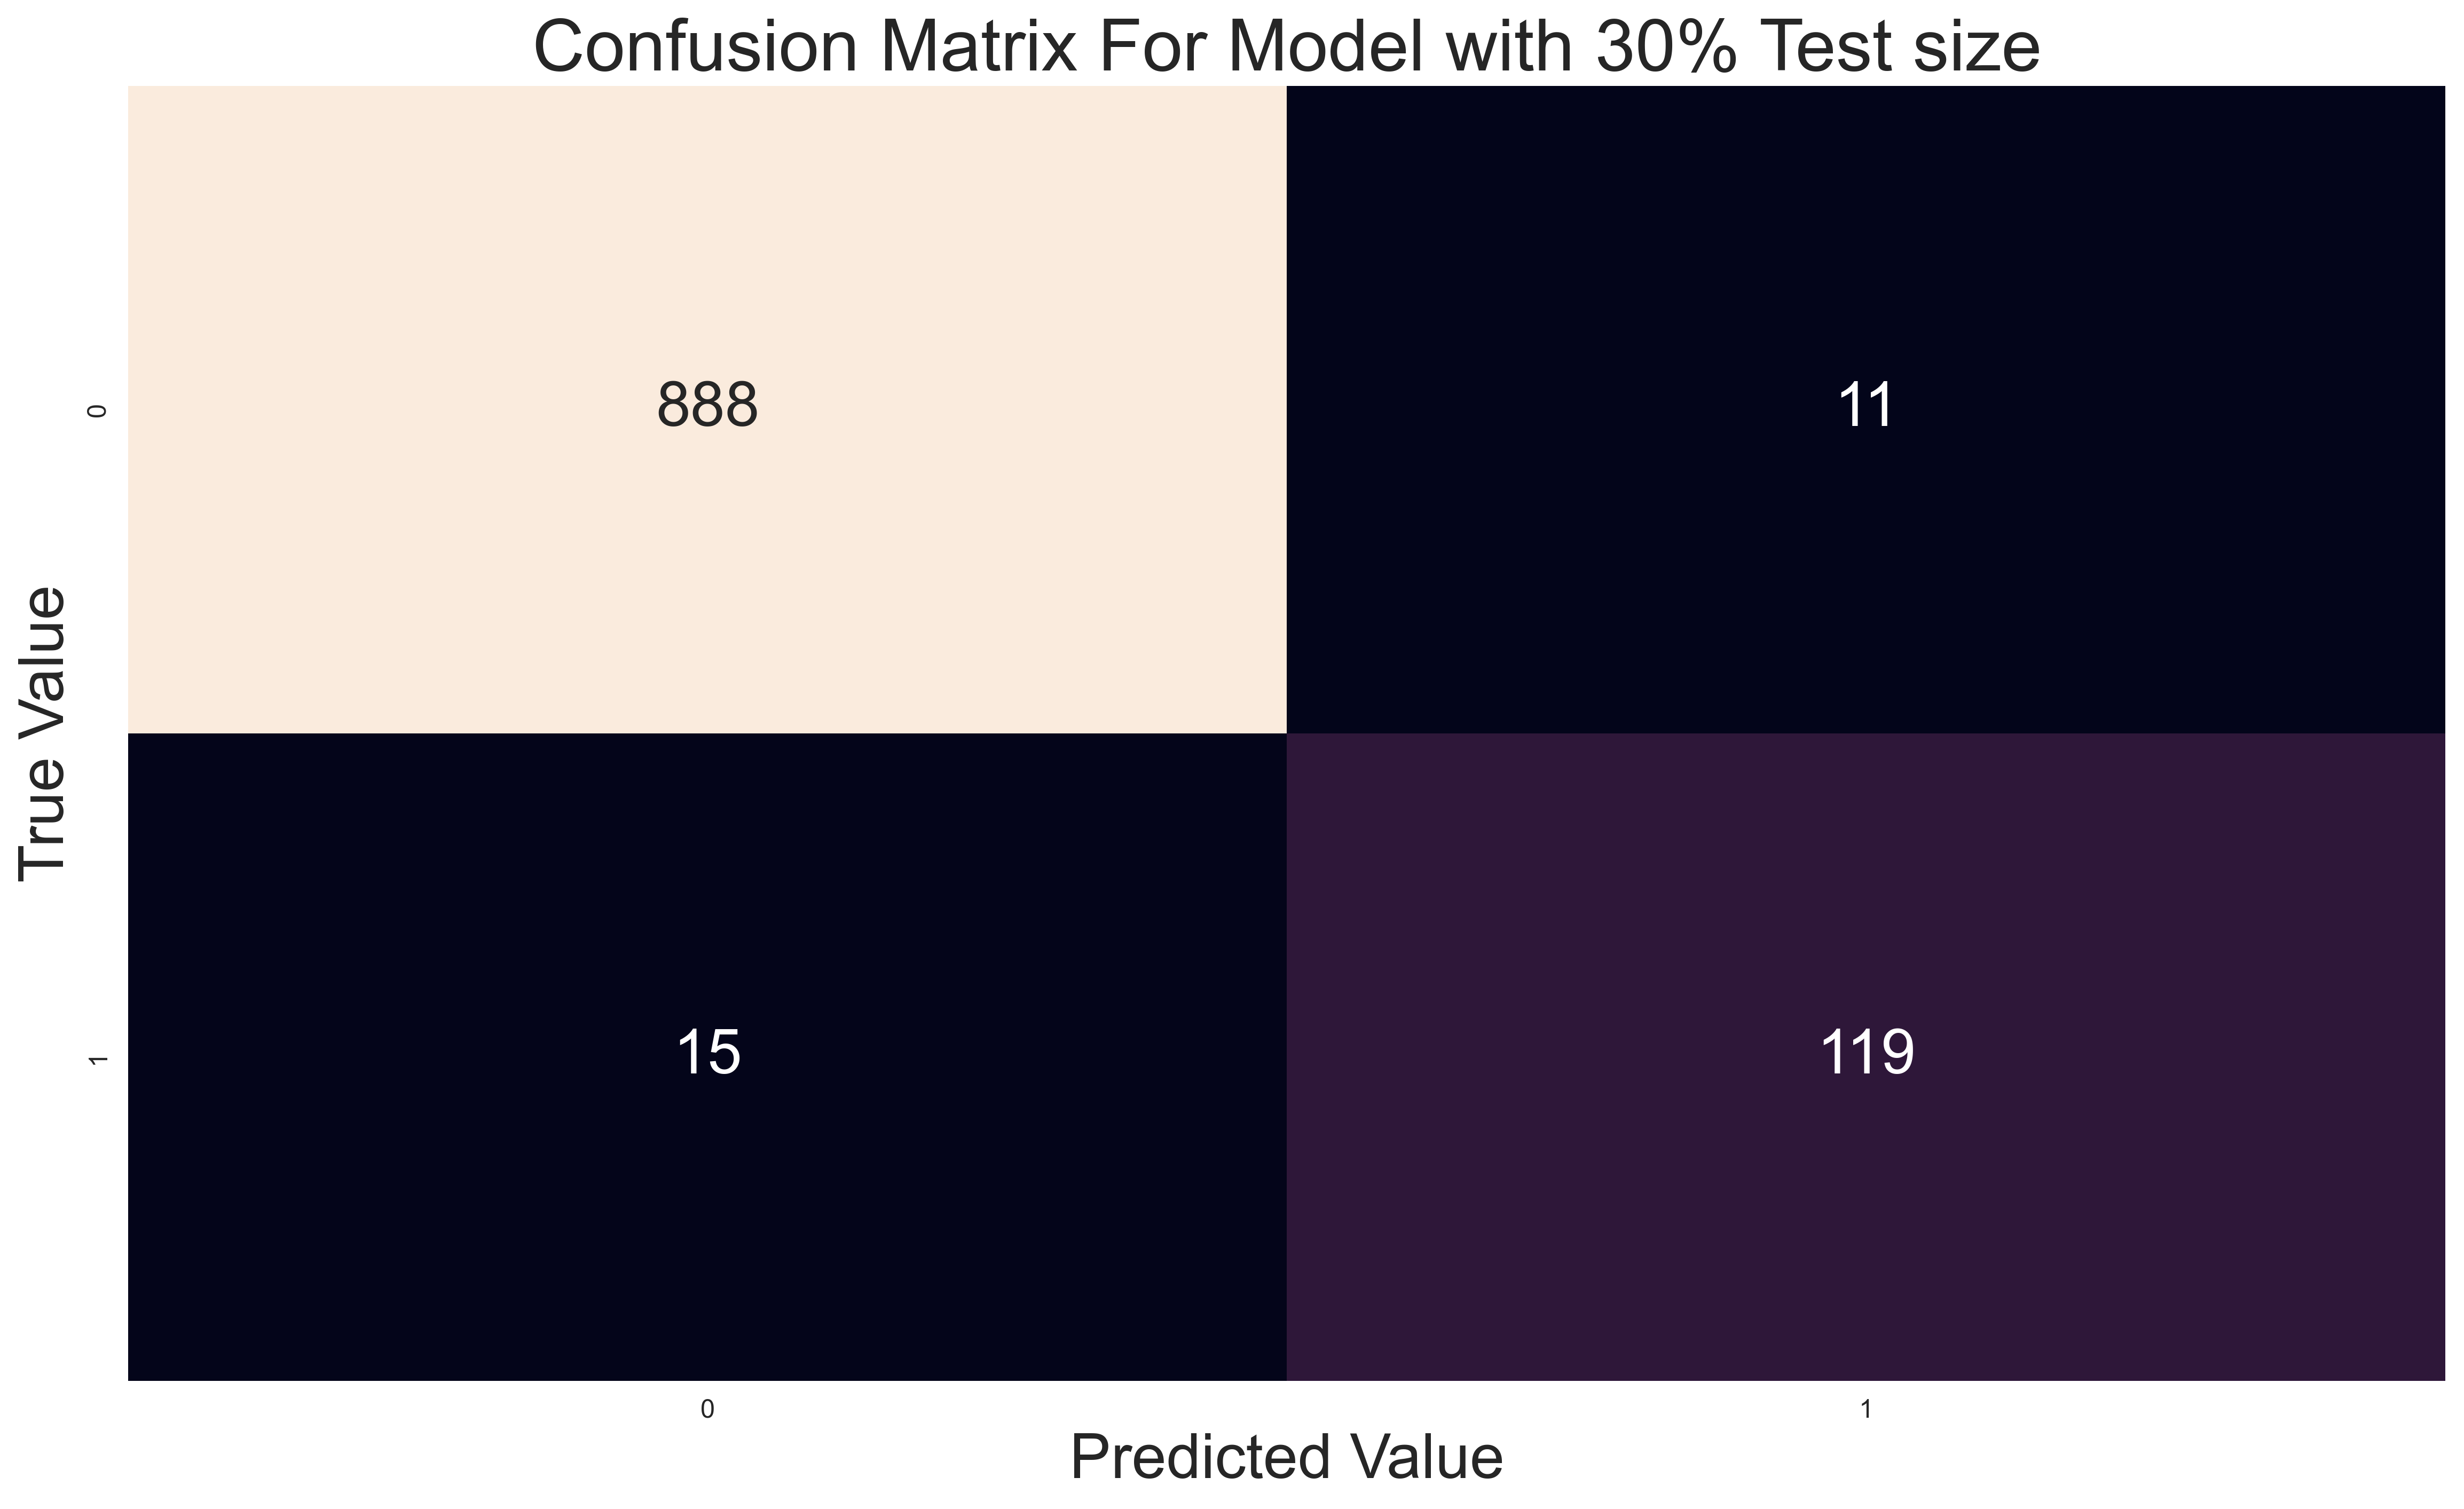

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Evaluating  Model with 20% Test size :-
Model Accuracy   :  0.97
Model precision  :  0.86
Model recall     :  0.89
Model f1_score   :  0.87
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       899
           1       0.86      0.89      0.87       134

    accuracy                           0.97      1033
   macro avg       0.92      0.93      0.93      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[879  20]
 [ 15 119]]


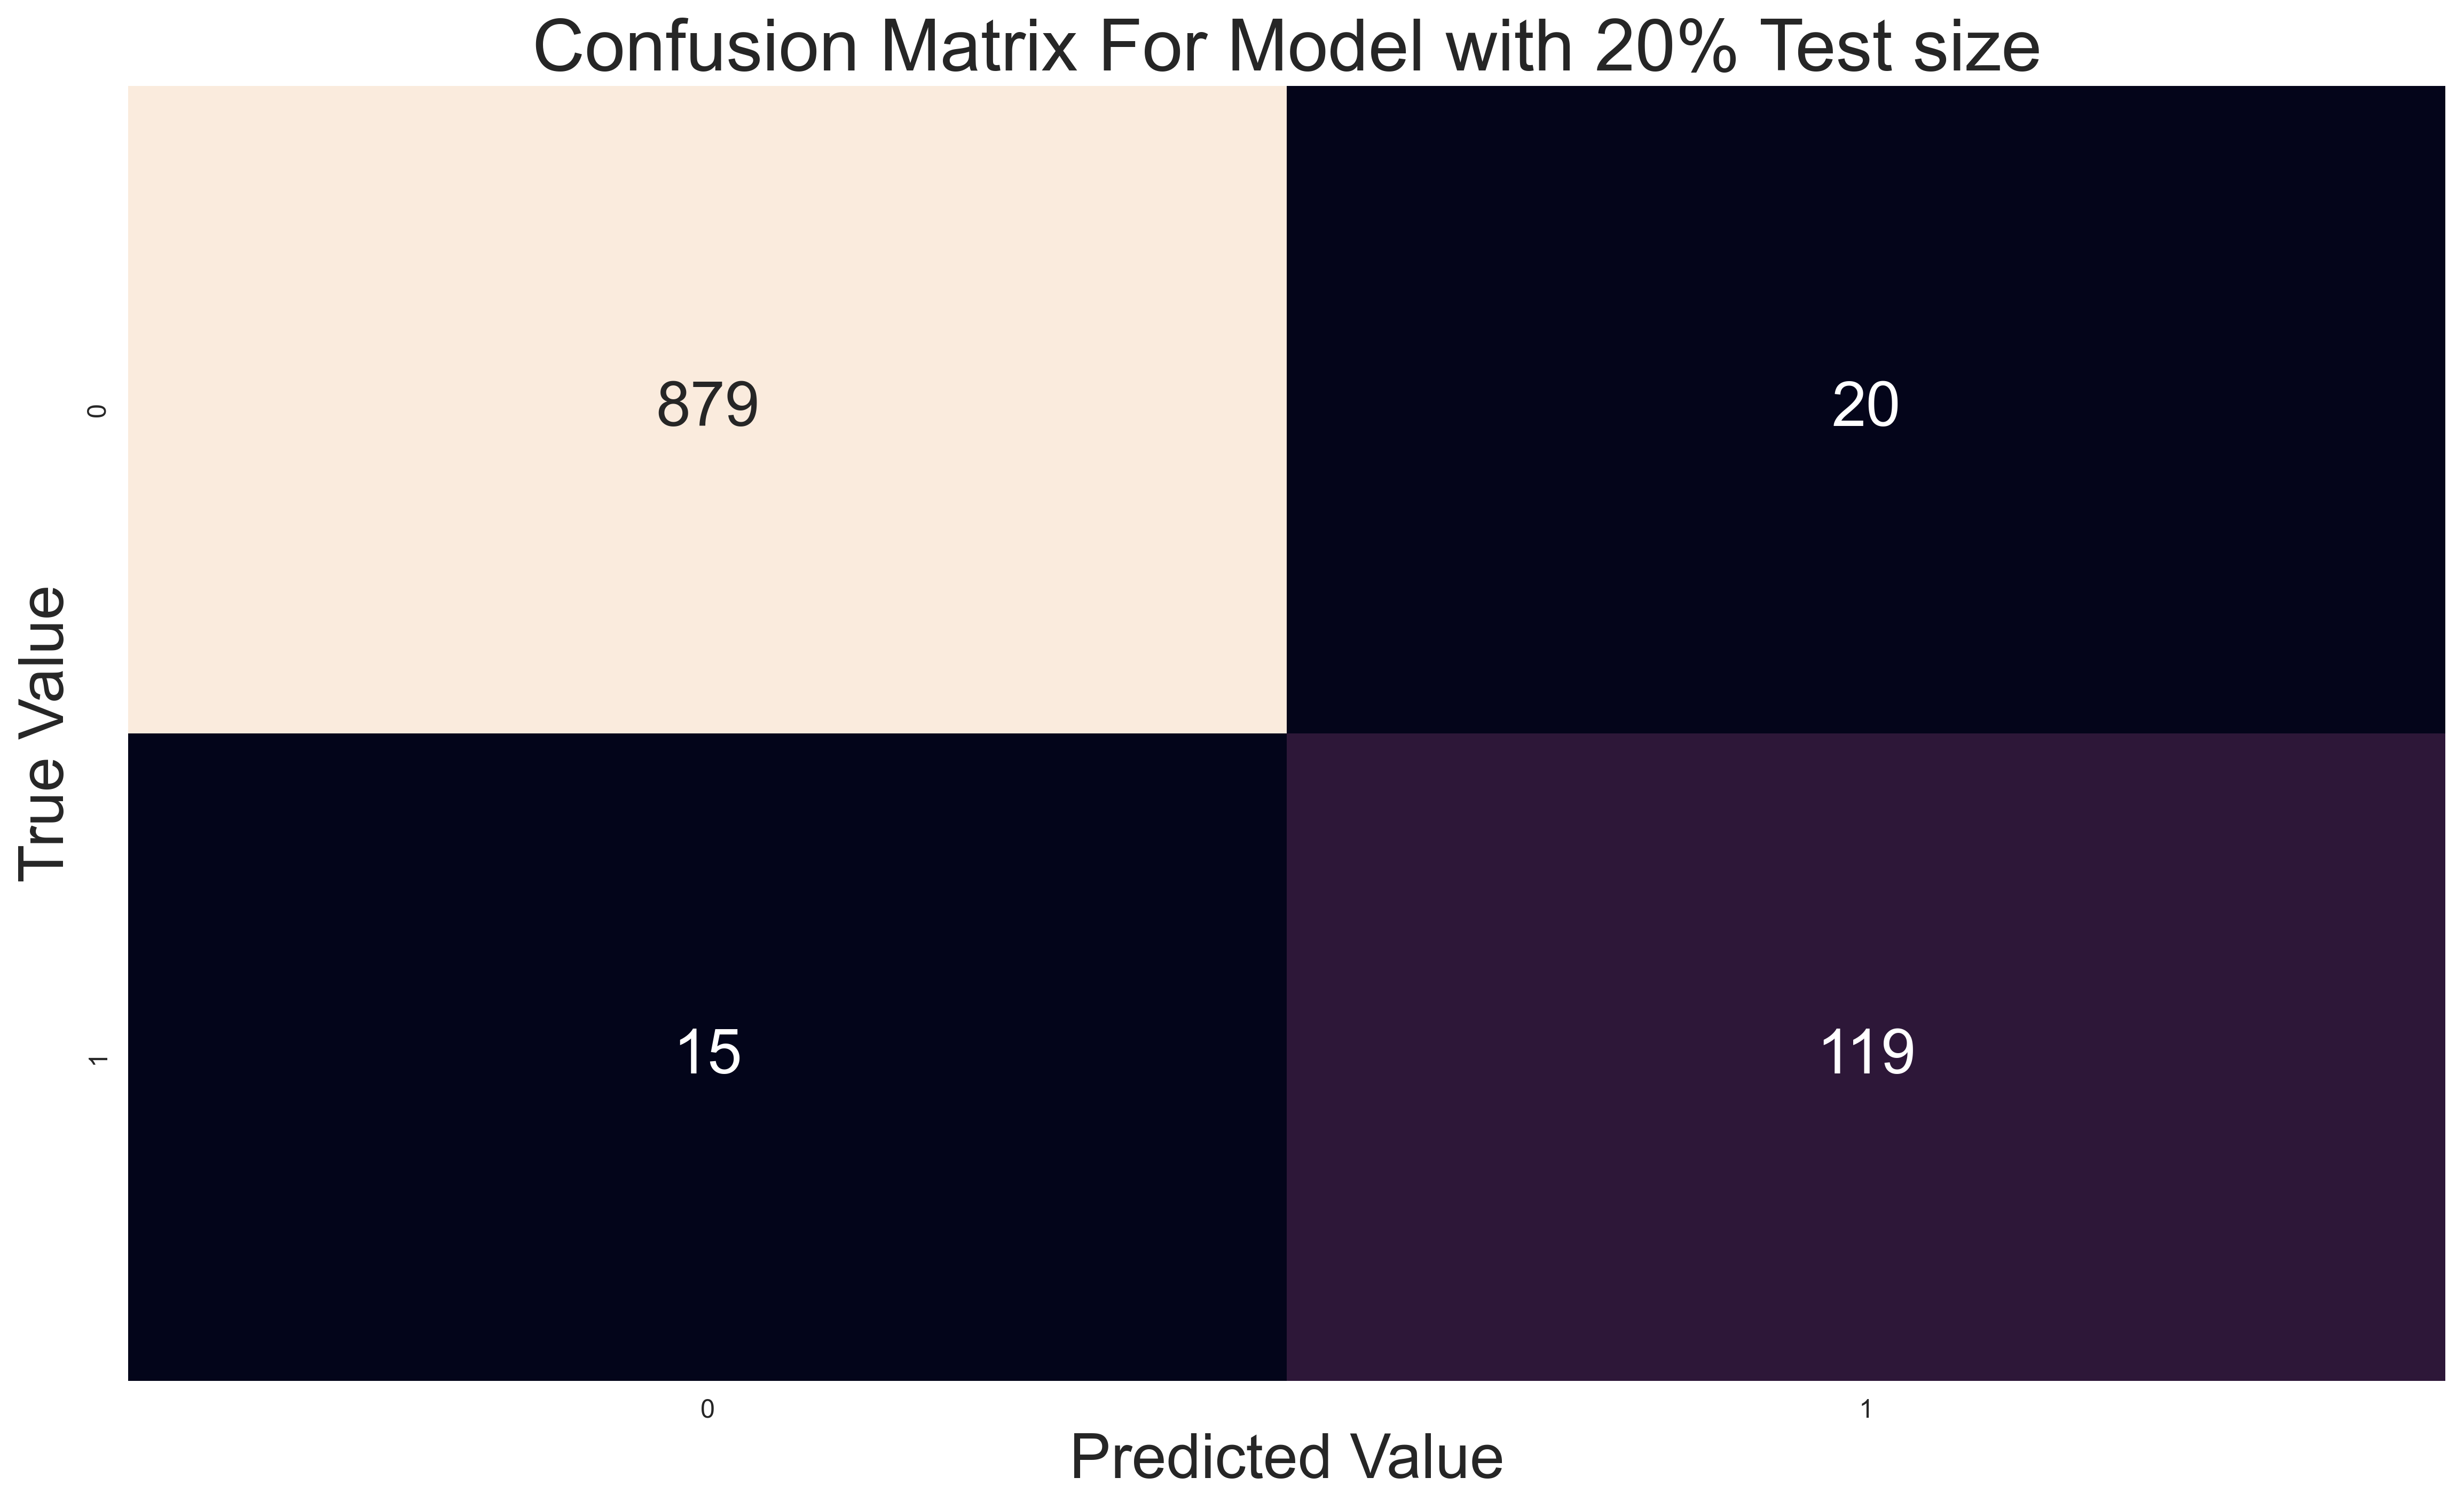

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Evaluating  ES Model with 20% Test size :-
Model Accuracy   :  0.97
Model precision  :  0.87
Model recall     :  0.93
Model f1_score   :  0.9
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       899
           1       0.87      0.93      0.90       134

    accuracy                           0.97      1033
   macro avg       0.93      0.96      0.94      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[881  18]
 [  9 125]]


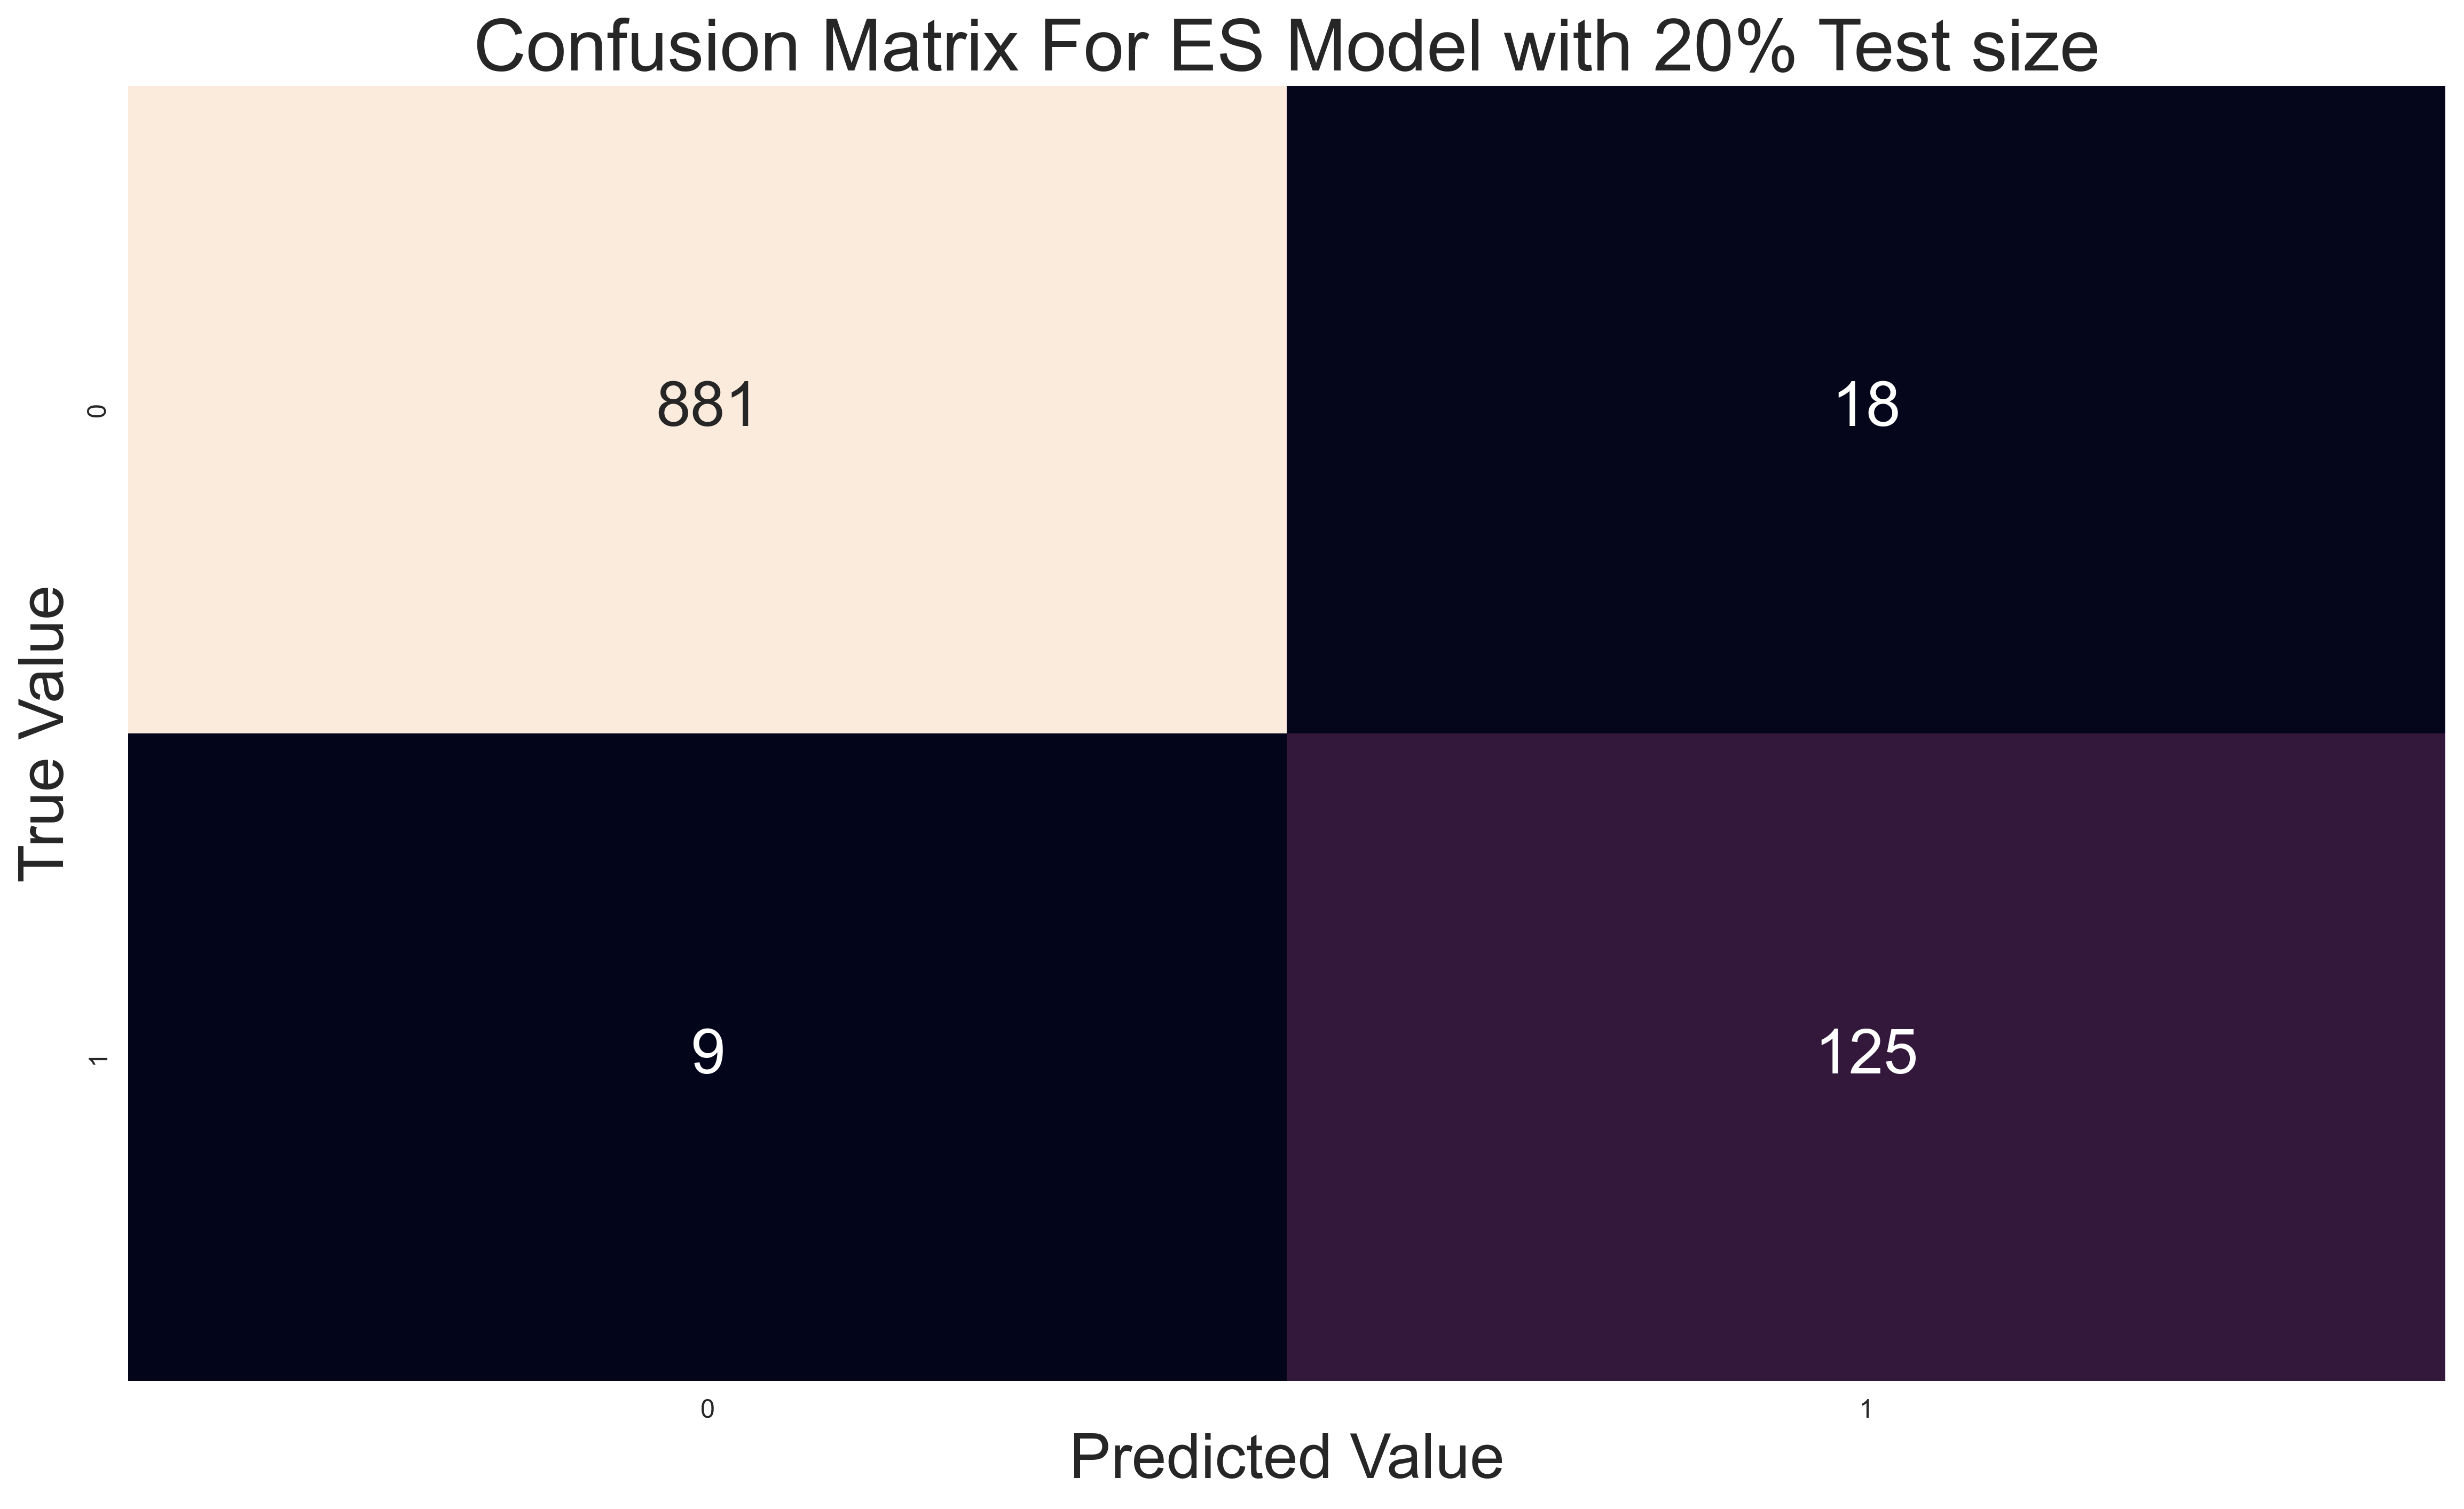

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
Evaluating  DOL Model with 20% Test size :-
Model Accuracy   :  0.97
Model precision  :  0.87
Model recall     :  0.9
Model f1_score   :  0.89
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       899
           1       0.87      0.90      0.89       134

    accuracy                           0.97      1033
   macro avg       0.93      0.94      0.93      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[881  18]
 [ 13 121]]


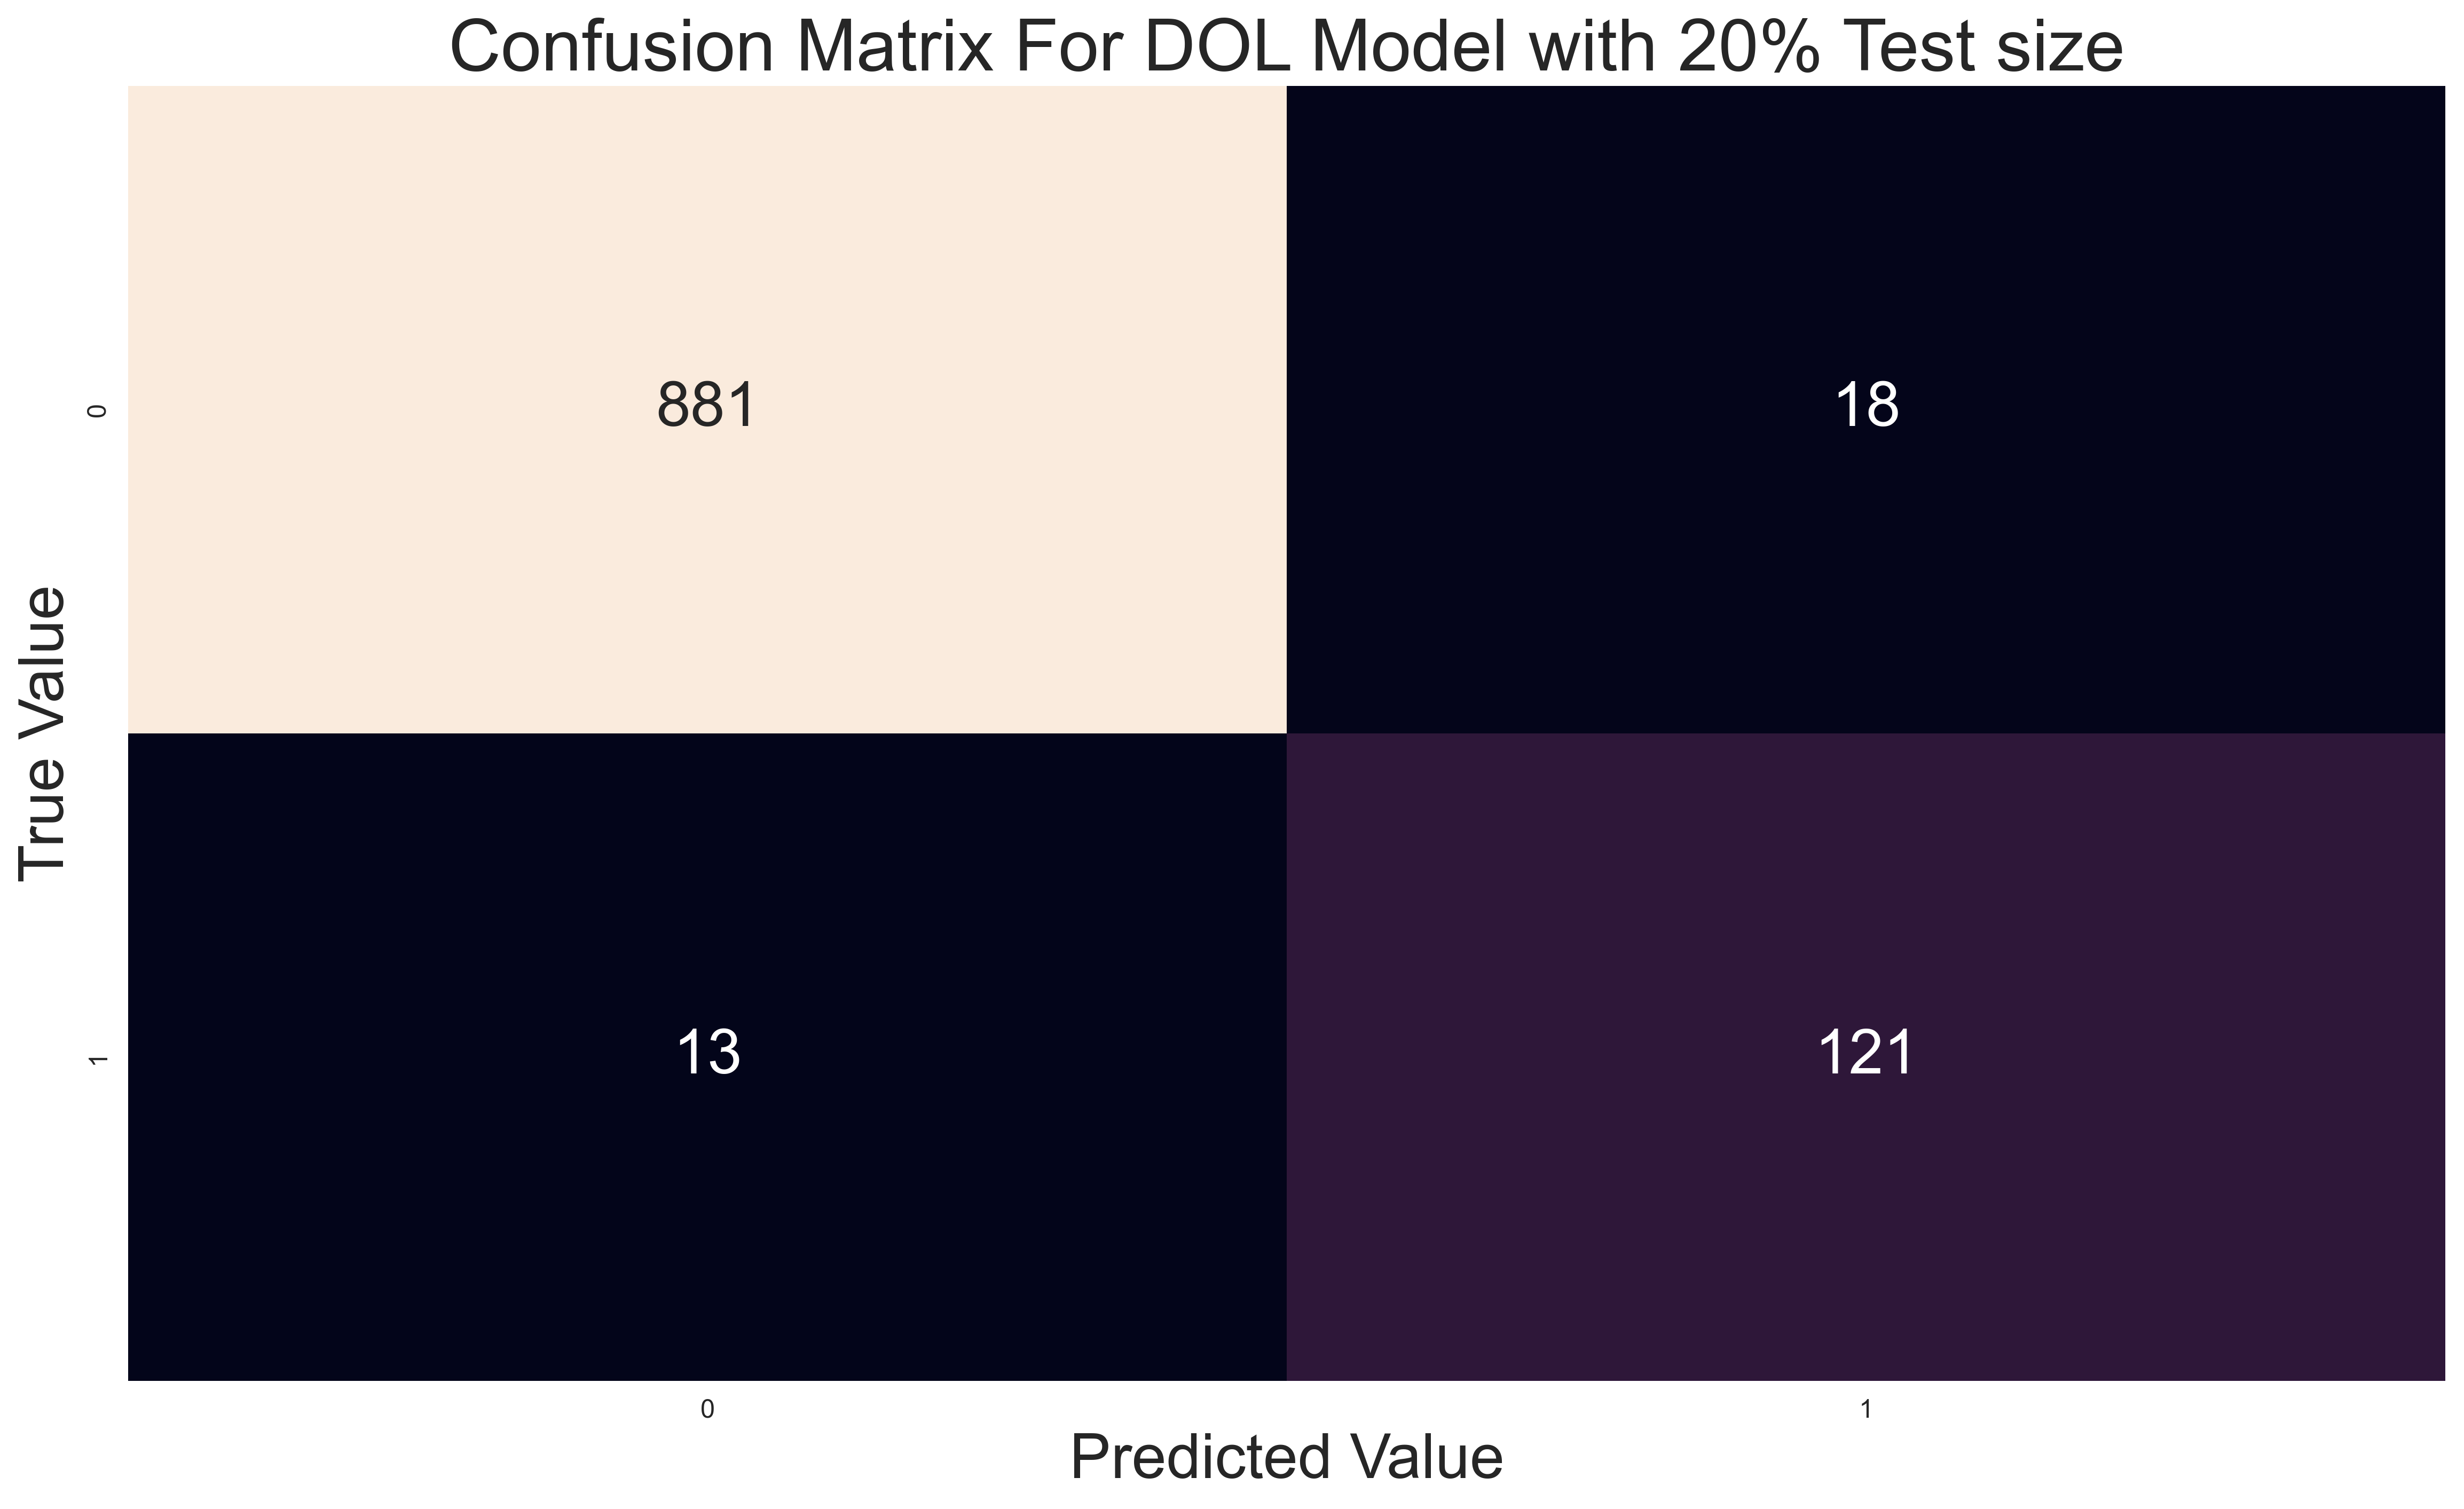

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
Evaluating  ES & DOL Model with 20% Test size :-
Model Accuracy   :  0.97
Model precision  :  0.94
Model recall     :  0.87
Model f1_score   :  0.9
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       899
           1       0.94      0.87      0.90       134

    accuracy                           0.97      1033
   macro avg       0.96      0.93      0.94      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[891   8]
 [ 18 116]]


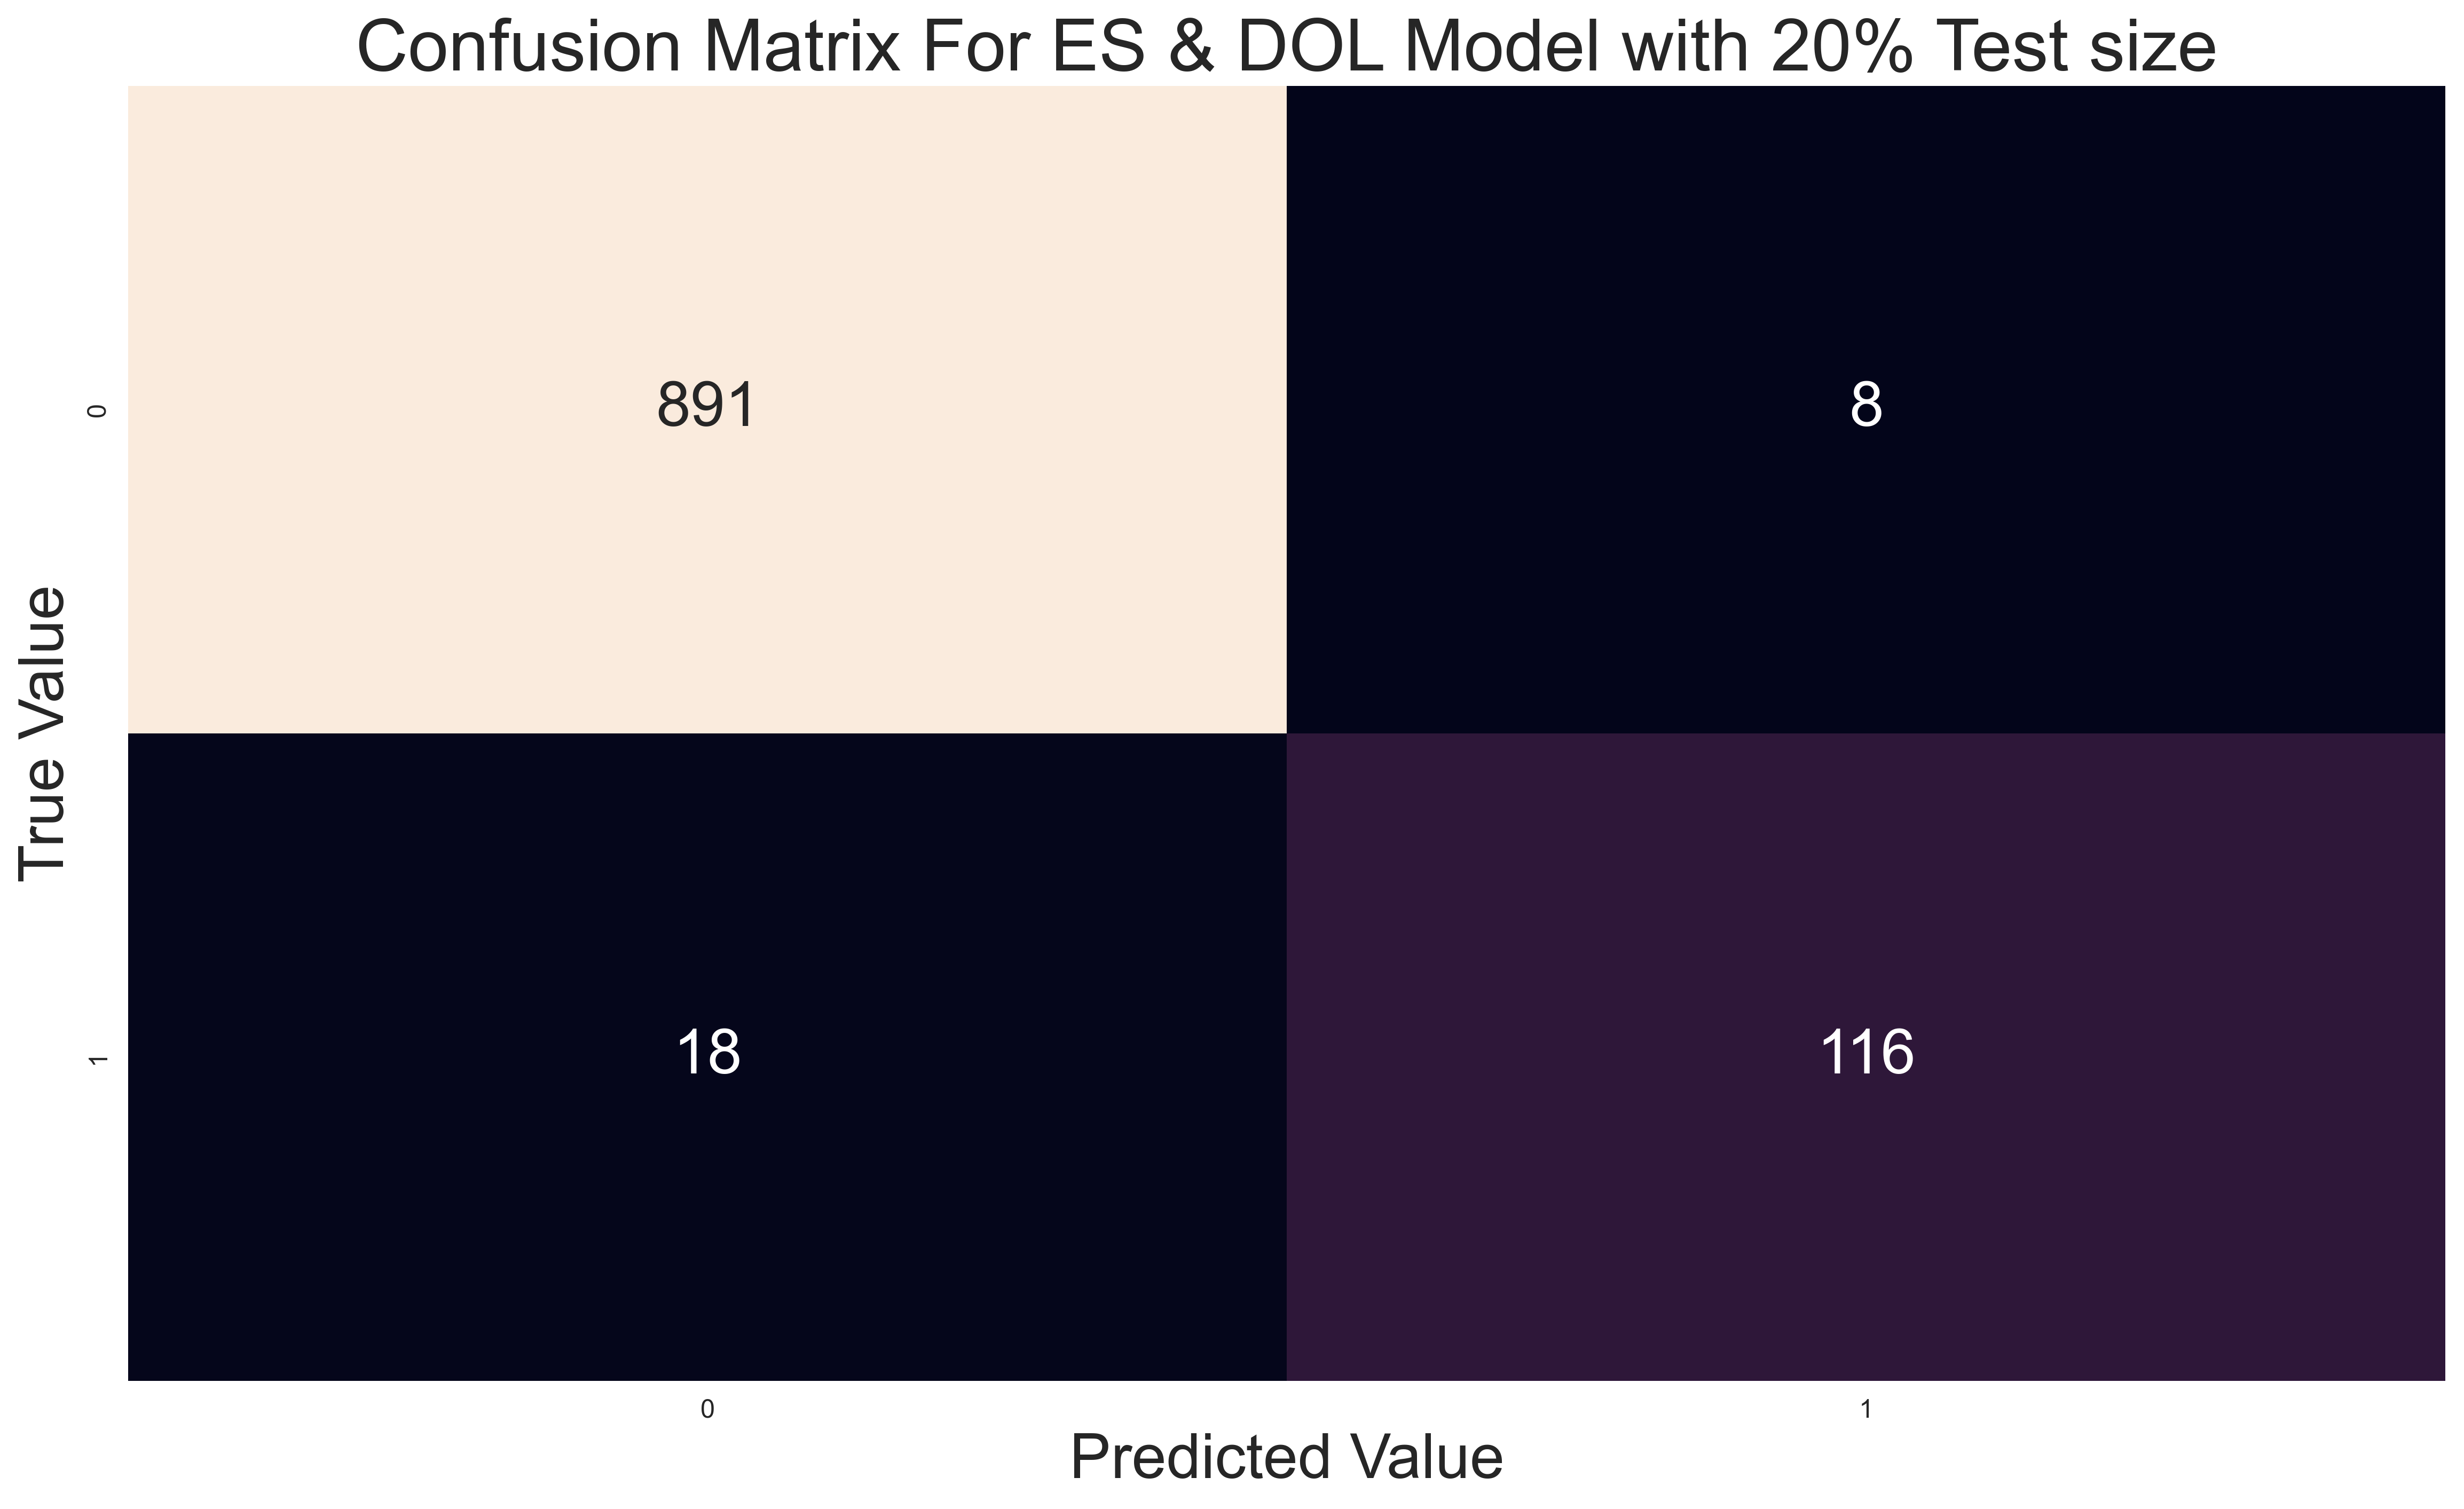

In [37]:
model = [model, def_model, es_model, dol_model, es_dol_model]
model_name = ['Model with 30% Test size','Model with 20% Test size', 'ES Model with 20% Test size', 'DOL Model with 20% Test size', 'ES & DOL Model with 20% Test size']

for i in range(len(model)):

    yp = model[i].predict(xtest)
    ypred = []

    for j in yp:
        if j > 0.5:
            ypred.append(1)
        else:
            ypred.append(0)

    print("Evaluating ", model_name[i], ":-")
    print("Model Accuracy   : ", round(accuracy_score(ytest, ypred), 2))
    print("Model precision  : ", round(precision_score(ytest, ypred), 2))
    print("Model recall     : ", round(recall_score(ytest, ypred), 2))
    print("Model f1_score   : ", round(f1_score(ytest, ypred), 2))
    print('Printing Confusion Matrix :')
    print(classification_report(ytest, ypred), '\n')
    print('Printing Confusion Matrix :')
    print(confusion_matrix(ytest, ypred))
    sns.heatmap(confusion_matrix(ytest, ypred), annot= True, fmt='d', cbar=False, annot_kws={'size':24})
    plt.title('Confusion Matrix For '+ model_name[i], fontsize=28)
    plt.xlabel('Predicted Value', fontsize=24)
    plt.ylabel('True Value', fontsize=24)
    plt.show()

### Ploting Accuracy VS Val-Accuracy For All Model

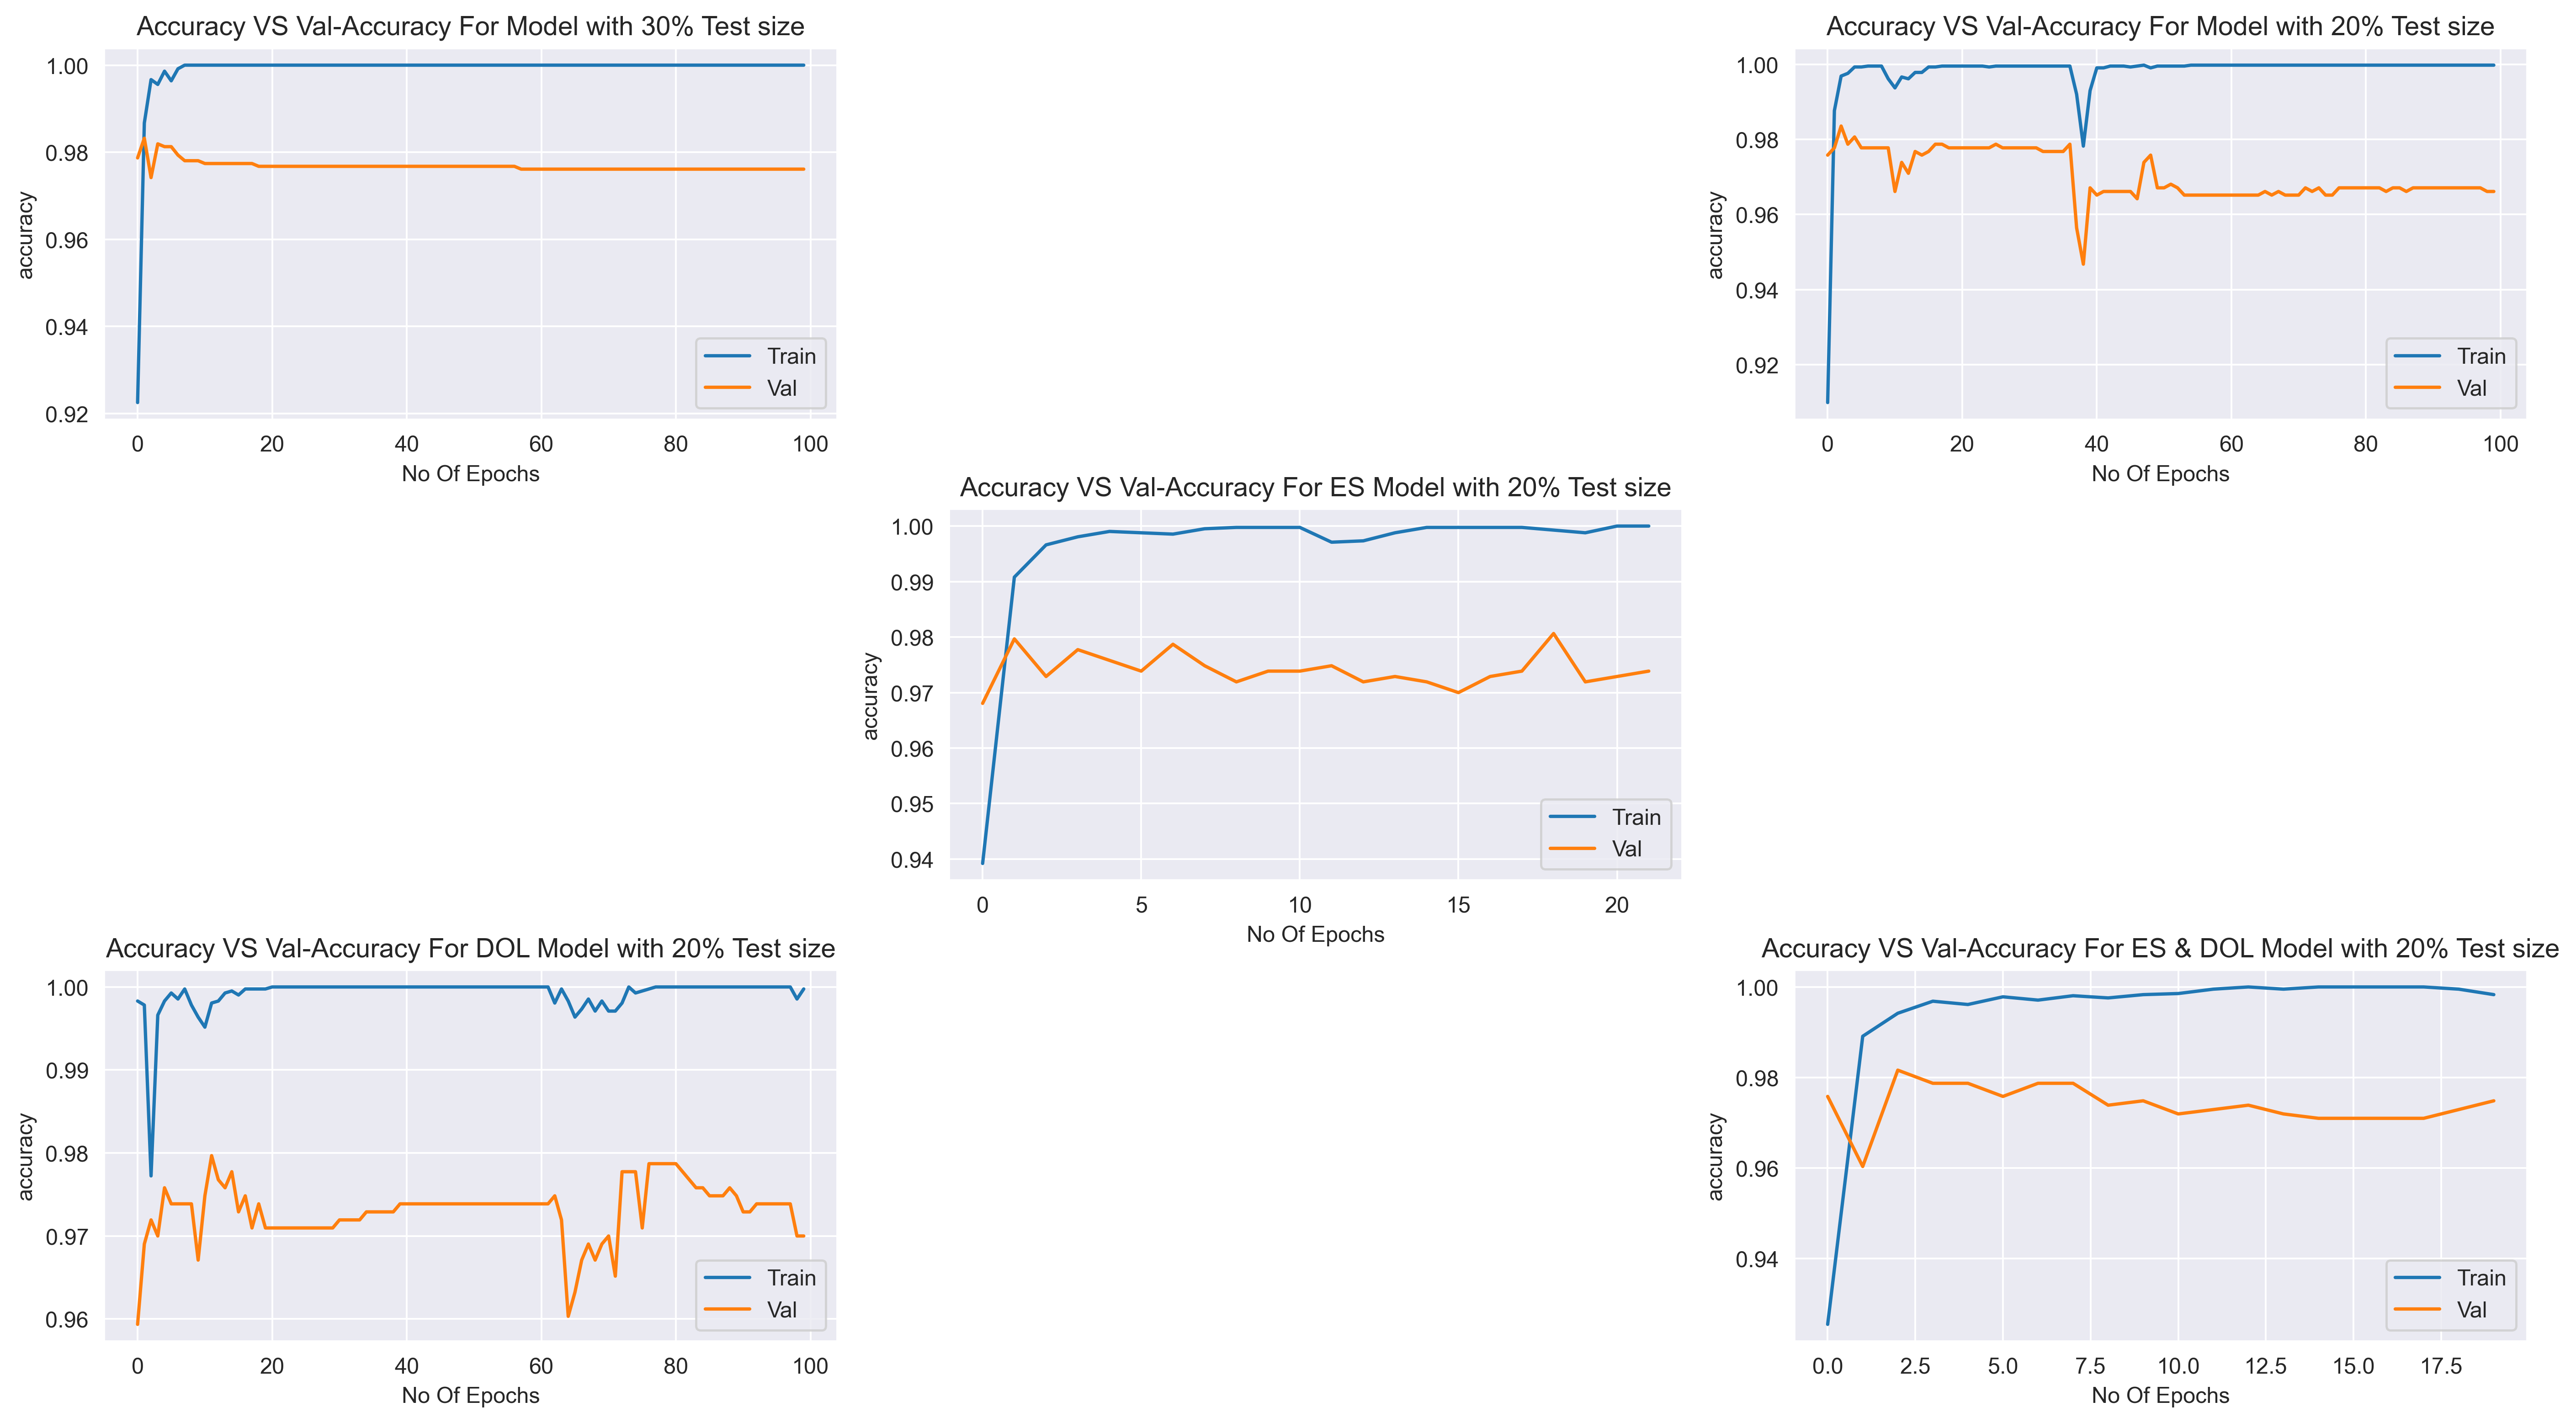

In [38]:
fig, ax = plt.subplots(3,3)


ax[0][0].set_title('Accuracy VS Val-Accuracy For Model with 30% Test size')
ax[0][0].set_xlabel('No Of Epochs')
ax[0][0].set_ylabel('accuracy')
sns.lineplot(history.history['accuracy'], label='Train', ax=ax[0][0])
sns.lineplot(history.history['val_accuracy'], label='Val', ax=ax[0][0])

fig.delaxes(ax[0][1])

ax[0][2].set_title('Accuracy VS Val-Accuracy For Model with 20% Test size')
ax[0][2].set_xlabel('No Of Epochs')
ax[0][2].set_ylabel('accuracy')
sns.lineplot(def_history.history['accuracy'], label='Train', ax=ax[0][2])
sns.lineplot(def_history.history['val_accuracy'], label='Val', ax=ax[0][2])

fig.delaxes(ax[1][0])

ax[1][1].set_title('Accuracy VS Val-Accuracy For ES Model with 20% Test size')
ax[1][1].set_xlabel('No Of Epochs')
ax[1][1].set_ylabel('accuracy')
sns.lineplot(es_history.history['accuracy'], label='Train', ax=ax[1][1])
sns.lineplot(es_history.history['val_accuracy'], label='Val', ax=ax[1][1])

fig.delaxes(ax[1][2])

ax[2][0].set_title('Accuracy VS Val-Accuracy For DOL Model with 20% Test size')
ax[2][0].set_xlabel('No Of Epochs')
ax[2][0].set_ylabel('accuracy')
sns.lineplot(dol_history.history['accuracy'], label='Train', ax=ax[2][0])
sns.lineplot(dol_history.history['val_accuracy'], label='Val', ax=ax[2][0])

fig.delaxes(ax[2][1])


ax[2][2].set_title('Accuracy VS Val-Accuracy For ES & DOL Model with 20% Test size')
ax[2][2].set_xlabel('No Of Epochs')
ax[2][2].set_ylabel('accuracy')
sns.lineplot(es_dol_history.history['accuracy'], label='Train', ax=ax[2][2])
sns.lineplot(es_dol_history.history['val_accuracy'], label='Val', ax=ax[2][2])


plt.tight_layout()
plt.show()

### Ploting Loss VS Val-Loss For All Model

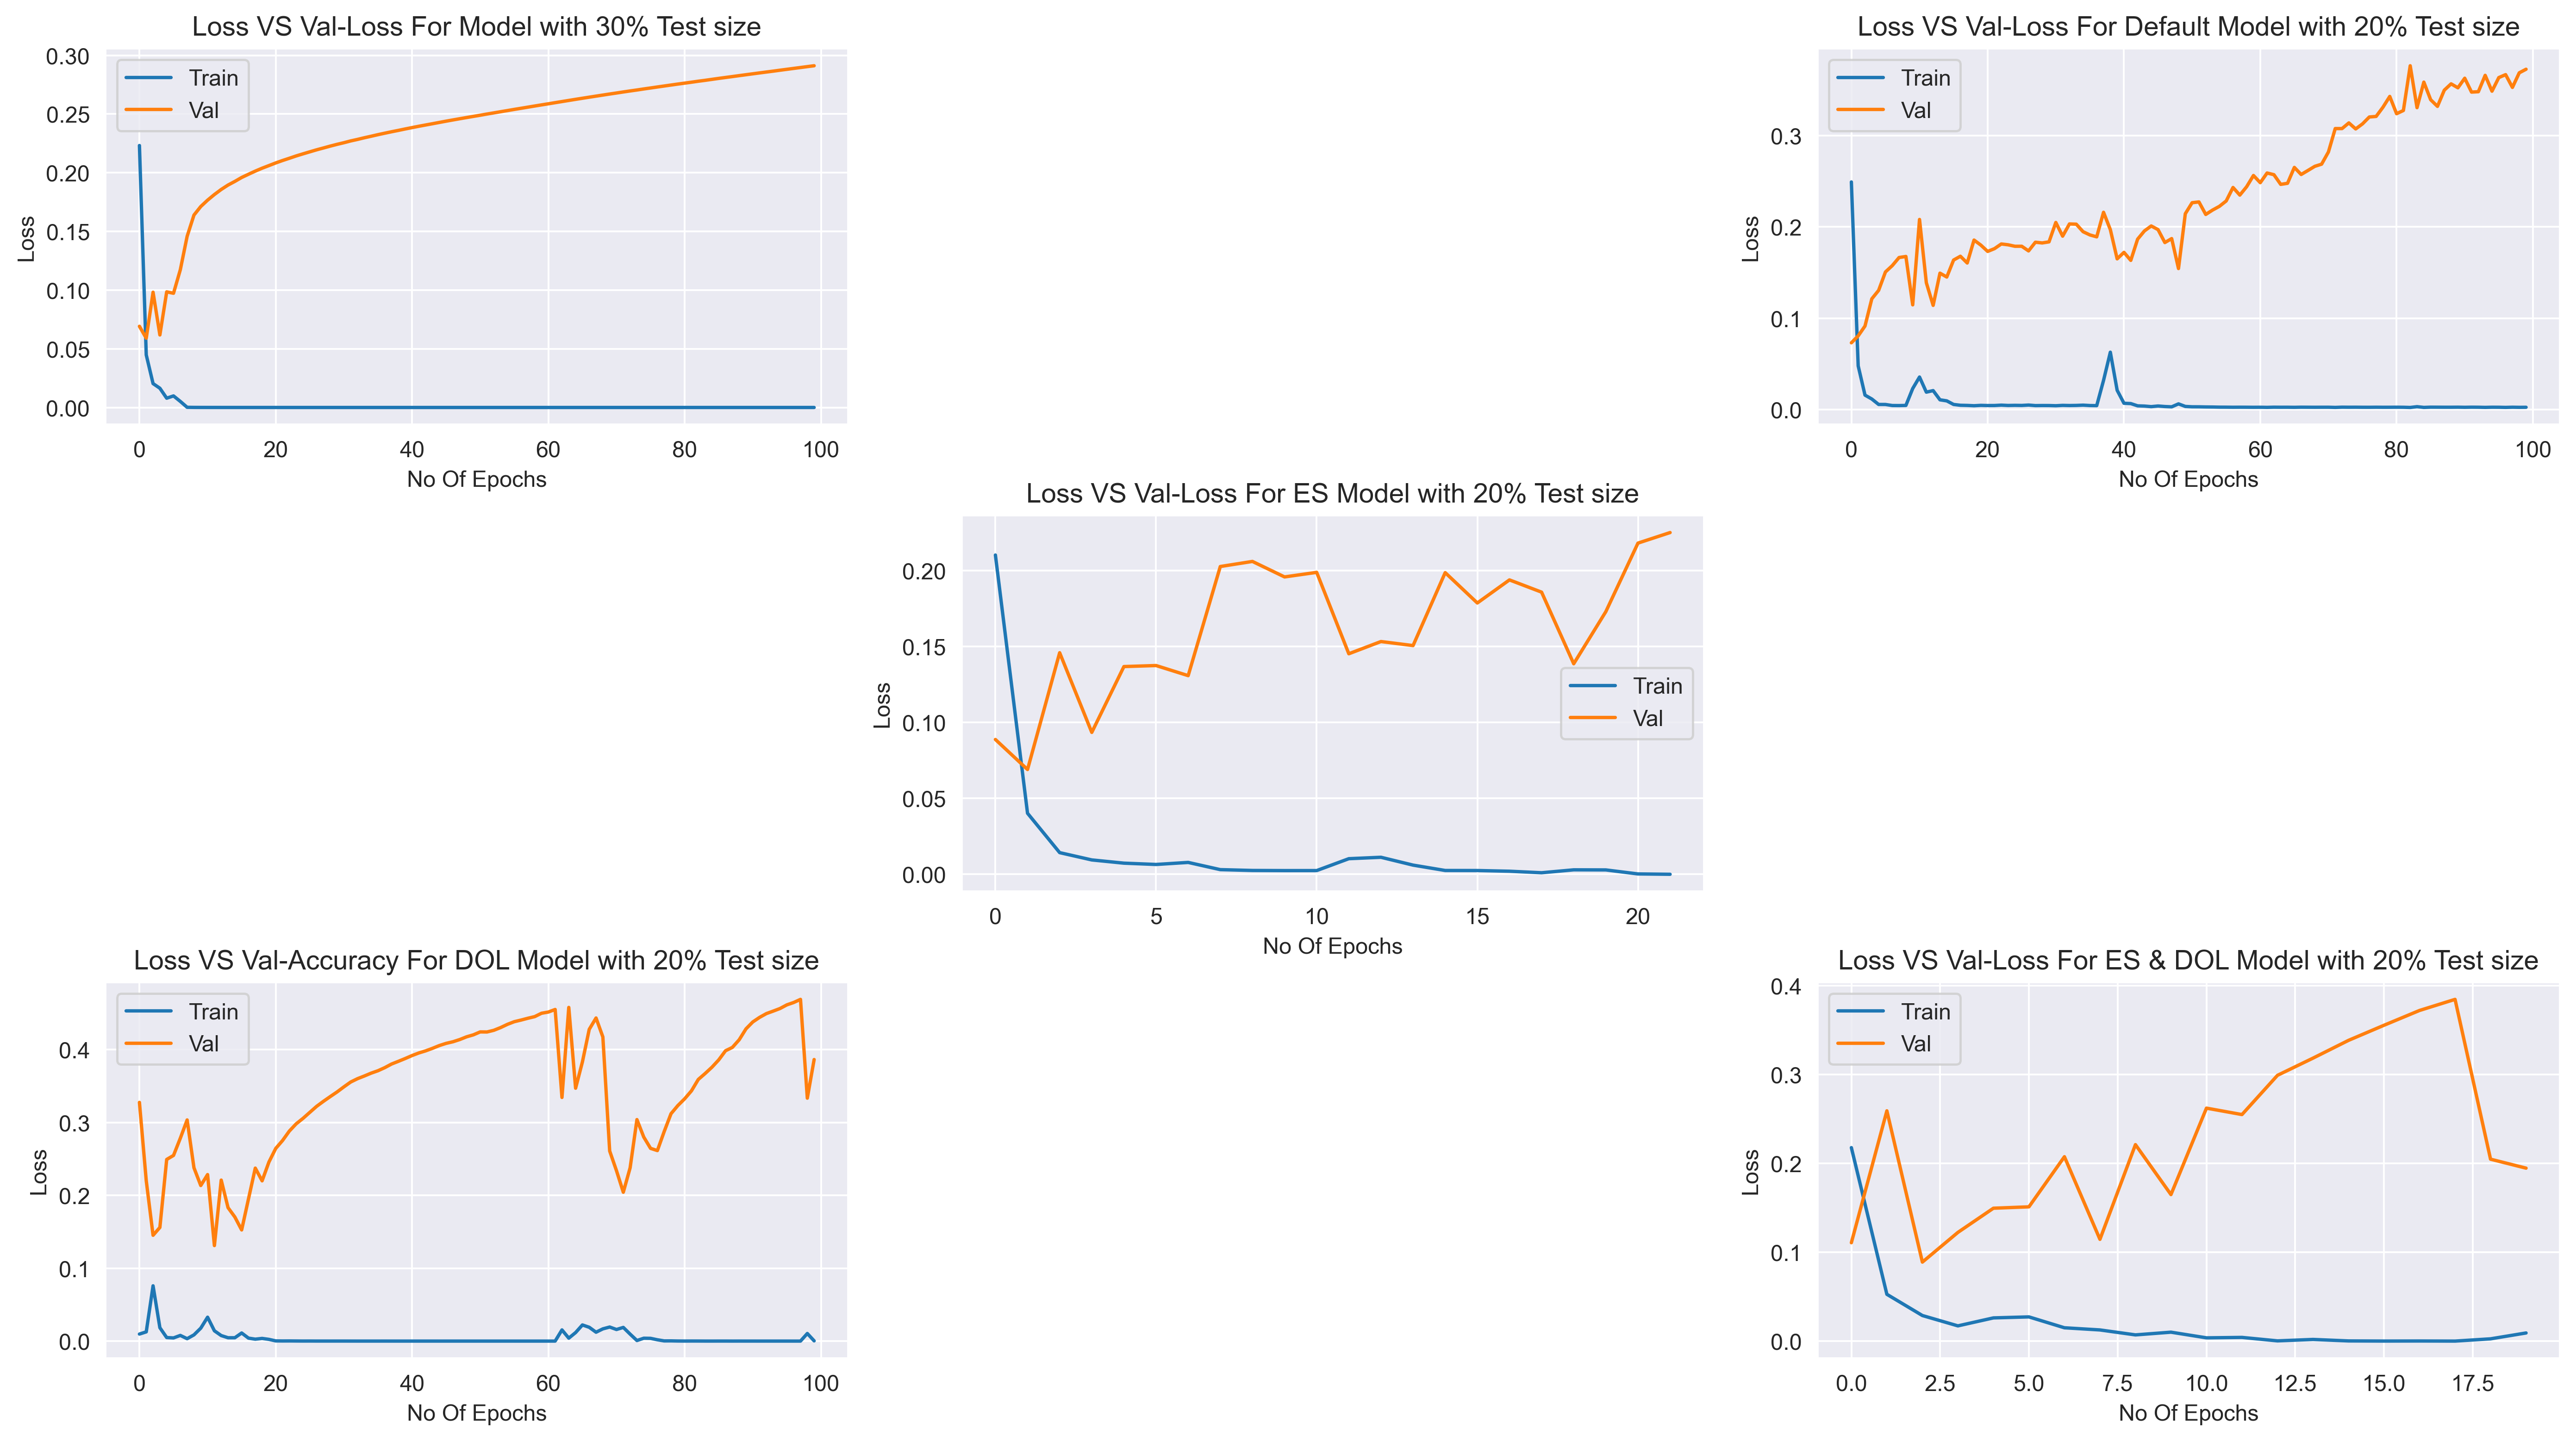

In [39]:
fig, ax = plt.subplots(3,3)

ax[0][0].set_title('Loss VS Val-Loss For Model with 30% Test size')
ax[0][0].set_xlabel('No Of Epochs')
ax[0][0].set_ylabel('Loss')
sns.lineplot(history.history['loss'], label='Train', ax=ax[0][0])
sns.lineplot(history.history['val_loss'], label='Val', ax=ax[0][0])

fig.delaxes(ax[0][1])

ax[0][2].set_title('Loss VS Val-Loss For Default Model with 20% Test size')
ax[0][2].set_xlabel('No Of Epochs')
ax[0][2].set_ylabel('Loss')
sns.lineplot(def_history.history['loss'], label='Train', ax=ax[0][2])
sns.lineplot(def_history.history['val_loss'], label='Val', ax=ax[0][2])

fig.delaxes(ax[1][0])

ax[1][1].set_title('Loss VS Val-Loss For ES Model with 20% Test size')
ax[1][1].set_xlabel('No Of Epochs')
ax[1][1].set_ylabel('Loss')
sns.lineplot(es_history.history['loss'], label='Train', ax=ax[1][1])
sns.lineplot(es_history.history['val_loss'], label='Val', ax=ax[1][1])

fig.delaxes(ax[1][2])

ax[2][0].set_title('Loss VS Val-Accuracy For DOL Model with 20% Test size')
ax[2][0].set_xlabel('No Of Epochs')
ax[2][0].set_ylabel('Loss')
sns.lineplot(dol_history.history['loss'], label='Train', ax=ax[2][0])
sns.lineplot(dol_history.history['val_loss'], label='Val', ax=ax[2][0])

fig.delaxes(ax[2][1])

ax[2][2].set_title('Loss VS Val-Loss For ES & DOL Model with 20% Test size')
ax[2][2].set_xlabel('No Of Epochs')
ax[2][2].set_ylabel('Loss')
sns.lineplot(es_dol_history.history['loss'], label='Train', ax=ax[2][2])
sns.lineplot(es_dol_history.history['val_loss'], label='Val', ax=ax[2][2])


plt.tight_layout()
plt.show()